<h1>CURIOSIDADES Sobre los asesinos en serie más famosos</h1>

<h1>¿Cuáles son los signos del zodiaco más peligrosos?   Te muestro la respuesta =)</h1> 

Trabajaremos con datasets de los asesinos en series más famosos de la historia

In [1]:
import pandas as pd 
import numpy as np 
import os
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Ubicamos todos los archivos de la capeta "Serial Killers" para unirlos en un solo dataset"

for dirname, _, filenames in os.walk('..\Serial Killers\Datos'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

..\Serial Killers\Datos\15_to_30_victim_count.csv
..\Serial Killers\Datos\5_to_14_victim_count.csv
..\Serial Killers\Datos\Fechas_nacimiento.xlsx
..\Serial Killers\Datos\Highest_victim_count.csv


In [3]:
# Importamos nuestros archivos y los concatenamos
import glob
data_files = glob.glob(os.path.join('', "..\Serial Killers\Datos\*victim_count.csv"))
df = pd.concat(map(lambda file: pd.read_csv(file), data_files))



In [4]:
df

Name                           Country  \
0                                Karl Denke                           Germany   
1   Francisco das Chagas Rodrigues de Brito                            Brazil   
2             Luis Gregorio Ramírez Maestre                          Colombia   
3                      David Thabo Simelane                         Swaziland   
4                                 Zhang Jun                             China   
..                                      ...                               ...   
29                     Ali Asghar Borujerdi  Ottoman Empire\r\n Iraq\r\n Iran   
30                          Vasili Komaroff                      Soviet Union   
31                 Fernando Hernández Leyva                            Mexico   
32              Ramadan Abdel Rehim Mansour                             Egypt   
33                            Radik Tagirov                            Russia   

    Years active Proven victims Possible victims  \
0   1900 to 1924             30              42+   
1   1989 to 2003             30               42   
2   2010 to 2013             30               30   
3   2000 to 2001             28               45   
4   1993 to 2000             28               28   
..           ...            ...              ...   
29  1907 to 1934             33               33   
30  1921 to 1923             33               33   
31  1982 to 1999             33             100+   
32  1999 to 2006             32              32+   
33  2011 to 2012             32               32   

                                                Notes  
0   Killed and cannibalized poor travelers and hom...  
1   Pedophile who sexually abused, murdered and mu...  
2   Killed motorists in various municipalities bef...  
3   Sexually assaulted women he befriended in fore...  
4   Robbed 22 stores in several Chinese provinces,...  
..                                                ...  
29  Known as "Asghar the Murderer". Killed 33 youn...  
30  Known as "The Wolf of Moscow"; horse trader wh...  
31  Confessed to 100 murders and six kidnappings a...  
32  Gang leader known as al-Tourbini ("The Express...  
33  Serial killer called Radik Tagirov who murdere...  

[276 rows x 6 columns]

In [5]:
#Eliminamos las notas del df porque no nos interesan
df.drop("Notes", axis=1, inplace=True)

<h2>Nacionalidad de los principales asesinos en serie</h2>

c:\Users\diana\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\diana\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


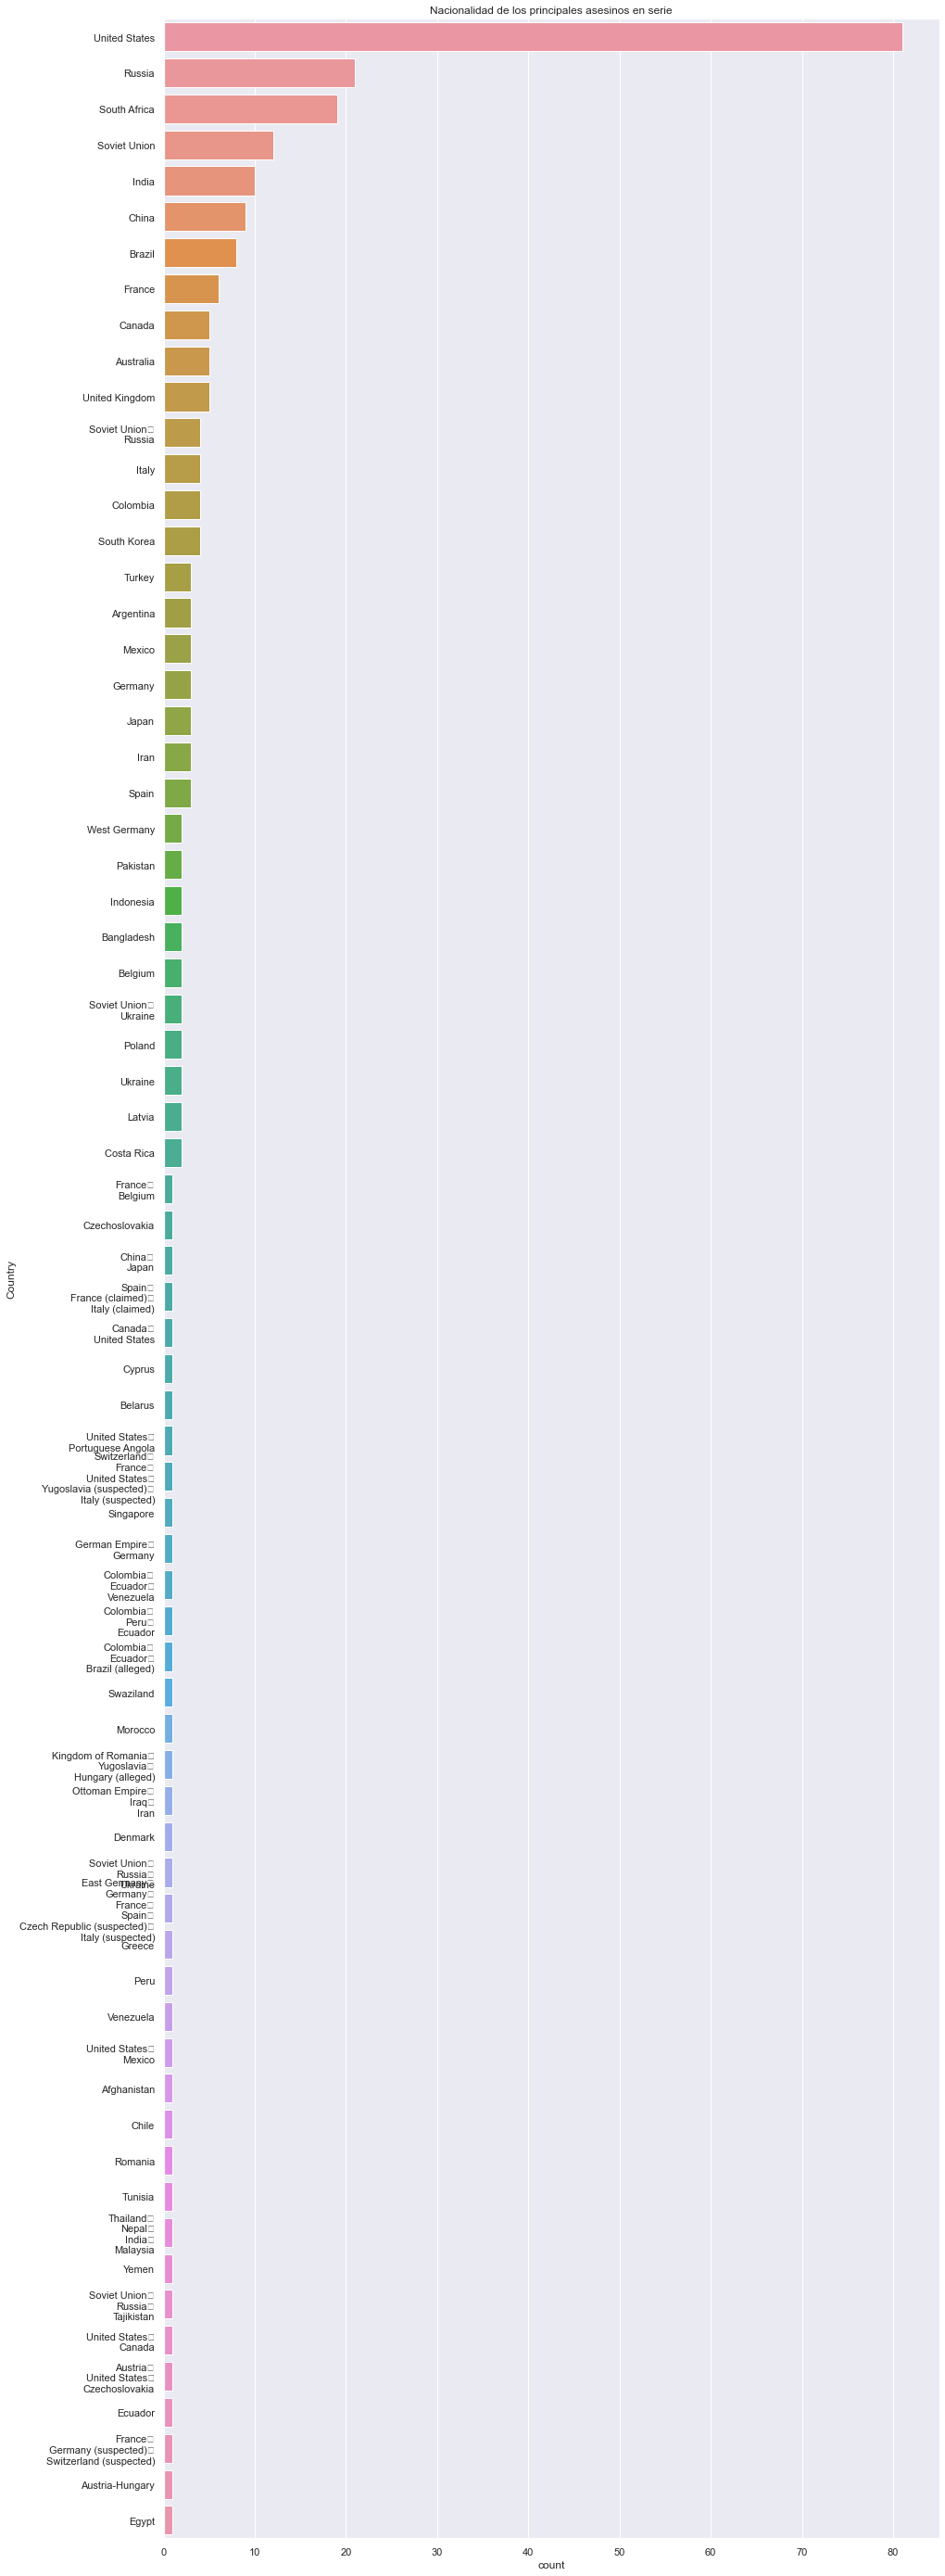

In [6]:
plt.figure(figsize=[15, 50])
p=sns.countplot(y=df["Country"],data =df, order = df['Country'].value_counts().index).set(title='Nacionalidad de los principales asesinos en serie')

<h2>Cantidad de Víctimas según países</h2>

Hay algunos valores que no son numéricos en la columna "Proven victims" ya que se encuentra un string en modo de rango, 
por lo que vamos a proceder a realizar unas correcciones según la media del rango indicado

In [7]:
df['Proven victims'].replace("11–16", int(14), inplace = True)
df['Proven victims'].replace("9–13", int(11), inplace = True)
df['Proven victims'].replace("8–15", int(12), inplace = True)
df['Proven victims'].replace("8–11+", int(10), inplace = True)

In [8]:
#Cambiamos la columna 'Proven victims' de string a numérica
df['Proven victims']= pd.to_numeric(df['Proven victims'])

In [9]:
df.groupby(['Country','Proven victims']).first()

Name  \
Country                 Proven victims                               
Afghanistan             20                           Abdullah Shah   
Argentina               11                            Robledo Puch   
                        13              Francisco Antonio Laureana   
                        15                     Florencio Fernández   
Australia               6                        John Wayne Glover   
...                                                            ...   
United States\r\nMexico 15                 Ángel Maturino Reséndiz   
Venezuela               15                         Dorángel Vargas   
West Germany            10                            Rudolf Pleil   
                        14                           Joachim Kroll   
Yemen                   12                       Abdallah al-Hubal   

                                        Years active Possible victims  
Country                 Proven victims                                 
Afghanistan             20                     1990s              20+  
Argentina               11                      1971             None  
                        13              1974 to 1975              13+  
                        15                     1950s               15  
Australia               6               1989 to 1990               13  
...                                              ...              ...  
United States\r\nMexico 15              1986 to 1999               18  
Venezuela               15              1997 to 1999             None  
West Germany            10              1946 to 1947               25  
                        14              1955 to 1976             None  
Yemen                   12              1990 to 1998             None  

[194 rows x 3 columns]

In [10]:
#Graficamos la cantidad de víctimas por países, seleccionando aquellos donde tengan más de 22 víctimas demostradas
top_pais=df[(df["Proven victims"]>=22)]


c:\Users\diana\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\diana\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


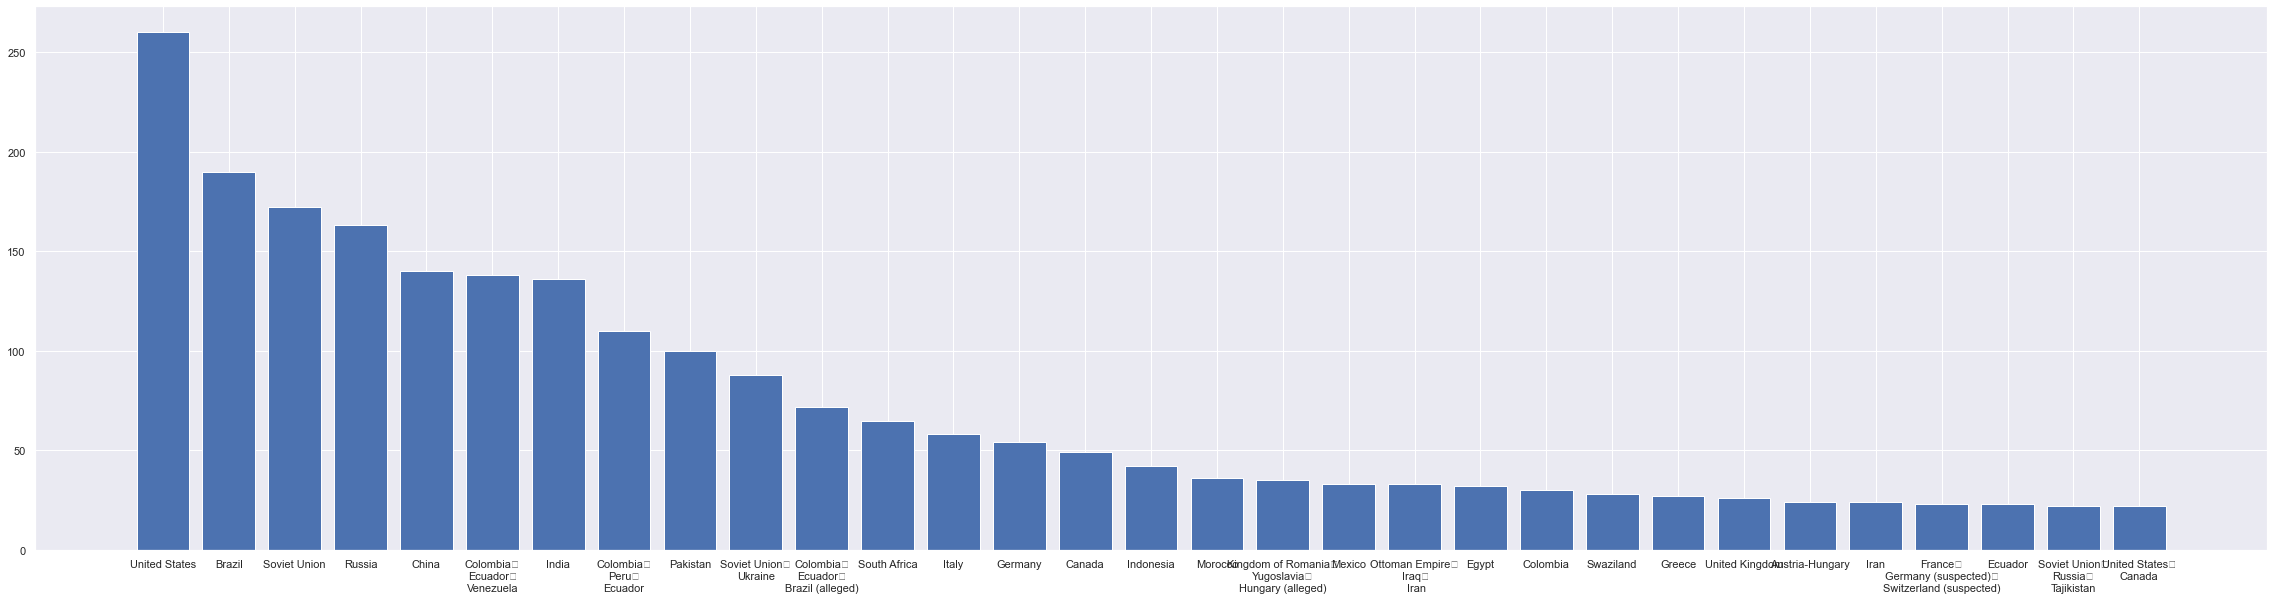

In [11]:
plt.figure(figsize=[40, 10])
plt.bar(top_pais.groupby('Country')['Proven victims'].sum().sort_values(ascending=False).index, top_pais.groupby('Country')['Proven victims'].sum().sort_values(ascending=False).values)
plt.show()

<h2>¿Cuáles son los signos del zodiaco más peligrosos?</h2>

In [12]:
#Abrimos nuestro archivo de fechas de nacimientos de cada persona
born= pd.read_excel("Datos\Fechas_nacimiento.xlsx")
born

Name                 Born
0                                 Karl Denke           12-02-1860
1    Francisco das Chagas Rodrigues de Brito                  NaN
2              Luis Gregorio Ramírez Maestre  1980-09-30 00:00:00
3                       David Thabo Simelane                  NaN
4                                  Zhang Jun  1998-07-20 00:00:00
..                                       ...                  ...
271                     Ali Asghar Borujerdi                  NaN
272                          Vasili Komaroff                  NaN
273                 Fernando Hernández Leyva  1964-11-30 00:00:00
274              Ramadan Abdel Rehim Mansour                  NaN
275                            Radik Tagirov                  NaN

[276 rows x 2 columns]

In [13]:
#Fusionamos ambos df
df= df.merge(born, left_on='Name', right_on='Name')

In [14]:
#Evaluamos los nans
df.isnull().sum()

Name                 0
Country              0
Years active         0
Proven victims       0
Possible victims    68
Born                84
dtype: int64

In [15]:
#Eliminamos las filas en las que el personaje no tenga fecha de nacimiento
df.dropna(subset=["Born"], inplace= True)

In [ ]:
#Convertimos en formato fecha la columna "Born"
df['Born']= pd.to_datetime(df['Born'])

In [17]:
#Creamos una función para asignar el signo de zodiaco que le corresponde a cada persona.
from datetime import datetime
def zodiaco(x):
    x = datetime.strptime(x, '%d-%m')
    if (x >= datetime.strptime("21-03", '%d-%m')) & (x <= datetime.strptime("20-04", '%d-%m')):
        return "Aries"
    elif (x >= datetime.strptime("21-04", '%d-%m')) & (x <= datetime.strptime("20-05", '%d-%m')):
        return "Tauro"
    elif (x >= datetime.strptime("21-05", '%d-%m')) & (x <= datetime.strptime("21-06", '%d-%m')):
        return "Géminis"
    elif (x >= datetime.strptime("22-06", '%d-%m')) & (x <= datetime.strptime("21-07", '%d-%m')):
        return "Cáncer"    
    elif (x >= datetime.strptime("22-07", '%d-%m')) & (x <= datetime.strptime("23-08", '%d-%m')):
        return "Leo"
    elif (x >= datetime.strptime("24-08", '%d-%m')) & (x <= datetime.strptime("23-09", '%d-%m')):
        return "Virgo" 
    elif (x >= datetime.strptime("24-09", '%d-%m')) & (x <= datetime.strptime("22-10", '%d-%m')):
        return "Libra"
    elif (x >= datetime.strptime("23-10", '%d-%m')) & (x <= datetime.strptime("22-11", '%d-%m')):
        return "Escorpio" 
    elif (x >= datetime.strptime("23-11", '%d-%m')) & (x <= datetime.strptime("21-12", '%d-%m')):
        return "Sagitario" 
    elif (x >= datetime.strptime("22-12", '%d-%m')) & (x <= datetime.strptime("31-12", '%d-%m')):
        return "Capricornio"
    elif (x >= datetime.strptime("01-01", '%d-%m')) & (x <= datetime.strptime("20-01", '%d-%m')):
        return "Capricornio"    
    elif (x >= datetime.strptime("21-01", '%d-%m')) & (x <= datetime.strptime("21-02", '%d-%m')):
        return "Acuario"
    elif (x >= datetime.strptime("22-02", '%d-%m')) & (x <= datetime.strptime("20-03", '%d-%m')):
        return "Piscis"  
    else:
        return "Error"

In [18]:
#Creamos una nueva columna en nuestro df solo con el día y mes de nacimiento
df["Día-Mes"] = df['Born'].dt.strftime('%d-%m')


In [19]:
# Reseteamos el index
df.reset_index(drop=True, inplace=True)
df.shape

(192, 7)

In [20]:
#df['zodiaco'] = df.apply(lambda x: zodiaco(x['Día-Mes']), axis=1)
df['Zodiaco']=df["Día-Mes"].apply(zodiaco)

In [21]:
df.groupby(['Zodiaco']).size()

Zodiaco
Acuario        20
Aries          17
Capricornio    20
Cáncer         17
Escorpio       20
Géminis        17
Leo            12
Libra          14
Piscis         17
Sagitario      19
Tauro          11
Virgo           8
dtype: int64

In [22]:
plt.figure(figsize=[14, 7])
p=sns.countplot(x=df["Zodiaco"],data =df, order = df['Zodiaco'].value_counts().index).set(title='Asesinos en serie agrupados por Signo')